# Load and extract Suicide Risk Lexicon

Lexicon validated by clincians with expertise in suicide research


In [1]:
!pip install construct-tracker

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from construct_tracker import lexicon

Matplotlib is building the font cache; this may take a moment.


In [ ]:
srl = lexicon.load_lexicon(name = 'srl_v1-0')

Just highly prototypical ones?

```python
srl_prototypes = lexicon.load_lexicon(name = 'srl_prototypes_v1-0')
```

In [ ]:
# load reddit posts and count 

reddit_df = pd.read_csv('https://mair.sites.fas.harvard.edu/datasets/rmhd_27subreddits_1300posts_train.csv', index_col = 0)reddit_df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,EDAnonymous,lillylourose,2018/11/28,"The reason why I stoped with eating? Well, for...",0.478964,2.747789,2.109524,95.205000,86.583333,4.761905,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
1,EDAnonymous,tinyTRONgirl,2019/10/15,I’m freaking out WHY can’t my body just digest...,5.559945,5.475852,6.247874,80.769913,67.394161,8.309854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.131764,0.000000,0.00000,0.0
2,EDAnonymous,Vetmyana,2019/07/02,Tw weight loss achievement Just lost 8lbs (wei...,2.546452,4.004821,3.520194,91.910290,75.451613,4.960000,...,0.0,0.254812,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,EDAnonymous,Fastingcametome,2019/07/25,When not eating is your solution to everything...,0.836122,2.859536,2.359891,95.598204,82.741497,5.824762,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.145753,0.00000,0.0
4,EDAnonymous,bananamo7,2019/04/19,How to dedicate a long weekend to beginning re...,5.119444,6.724697,6.719444,70.932500,69.185185,10.585185,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,unitedkingdom,Anomalous-Entity,2019/05/07,When someone is having a go at the U.S. and ma...,1.758324,4.527215,4.326374,77.275769,88.038462,6.048352,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.258879,0.000000,0.00000,0.0
28076,unitedkingdom,Squigglish,2019/03/28,My MP voted against every single Indicative Mo...,6.098205,9.032098,6.976923,52.759744,104.384615,7.887179,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28077,unitedkingdom,javaxcore,2019/09/02,What is Order 66? I have heard much talk of th...,0.761500,2.701924,1.290000,103.625000,82.500000,4.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28078,unitedkingdom,AlwaysGoForAusInRisk,2019/05/13,Seeing the GB Ambassador for Denmark today at ...,8.632452,8.773091,9.139258,61.853071,60.968504,12.296513,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [ ]:
reddit_df.groupby('subreddit').count()['author']

subreddit
EDAnonymous          1040
ForeverAlone         1040
UKPersonalFinance    1040
addiction            1040
adhd                 1040
alcoholism           1040
anxiety              1040
autism               1040
bipolarreddit        1040
bpd                  1040
conspiracy           1040
depression           1040
divorce              1040
guns                 1040
healthanxiety        1040
legaladvice          1040
lonely               1040
mentalhealth         1040
mindfulness          1040
personalfinance      1040
ptsd                 1040
schizophrenia        1040
socialanxiety        1040
suicidewatch         1040
teaching             1040
ukpolitics           1040
unitedkingdom        1040
Name: author, dtype: int64

Let's just look at 4 subreddits

In [ ]:
reddit_df_mini = reddit_df[reddit_df['subreddit'].isin(['anxiety','bpd','depression','suicidewatch'])]

In [7]:

toy = True # First try running on a subset of documents

if toy:
	# Sample a subset and obtain documents column
	reddit_df_mini = reddit_df_mini.sample(n=20, random_state=42)
	documents = reddit_df_mini['post'].values
	subreddits = reddit_df_mini['subreddit'].values
	print(len(documents))






20


### 1. Count tokens using lexicon

In [8]:
# Now count whether tokens appear in document:
# About 75 sec for 4160 reddits posts

load = False

save_dir = './data/feature_extraction/reddit_27/'

if load:
	counts = pd.read_csv(save_dir+'suicide_risk_lexicon_counts.csv')
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	with open(save_dir+'suicide_risk_lexicon_matches_construct2doc.json', 'r') as json_file:
		matches_construct2doc  = json.load(json_file)

	# Can do the same for matches_by_construct, matches_doc2construct

else:
	counts, matches_by_construct, matches_doc2construct, matches_construct2doc  = srl.extract(documents,
																						normalize = False,
																						save_dir = save_dir
																						)
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	display(counts)
	


extracting... 


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,0,Is it life really worth living? I finished col...,1,1,0,0,0,2,0,2,...,0,0,0,0,0,2,0,0,200,suicidewatch
1,1,I’m broken and unlovable I spent the first 17 ...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,142,suicidewatch
2,2,Anxiety about my brain My panic attacks come i...,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,1,73,anxiety
3,3,Scared of my own thoughts I was listening to m...,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,42,depression
4,4,I'm not going to kill myself today. Not today.,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,depression
5,5,Really scared to lose my FP. Am I overreacting...,0,0,0,0,0,0,0,3,...,0,0,0,1,0,1,0,0,400,bpd
6,6,Been through this a few times. The time is nea...,0,0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,108,suicidewatch
7,7,Trying to pull together Sometimes I feel like ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,75,suicidewatch
8,8,Couch vs Bed Is it just me or do other people ...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,68,depression
9,9,What are some things I can do to be supportive...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,86,depression


In [9]:
# Interpret counts: visualize matches in context  


n = 2
highlight_constructs = ['Lethal means for suicide', 'Passive suicidal ideation', 'Direct self-injury', 'Panic', 'Depressed mood']
for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	lexicon.highlight_matches(documents, construct,n, matches_construct2doc, random_seed=42)
	print()



Matches for Lethal means for suicide:



Matches for Passive suicidal ideation:



Matches for Direct self-injury:



Matches for Panic:



Matches for Depressed mood:


Text(0, 0.5, 'counts')

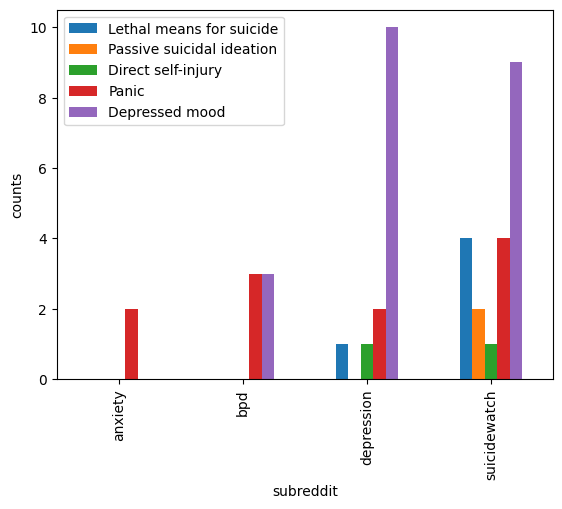

In [14]:
# Bar plot of counts split by subreddit
counts[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel('counts')
